# Laboratory Activity 4

**Instruction:** Train a linear regression model in PyTorch using a regression dataset. Use the following parameters.

- `Criterion: MSE Loss`
- `Fully Connected Layers x 2`
- `Batch Size: 8`
- `Optimizer: SGD`
- `Epoch: 1000`

### Import Libraries

In this step, we import all necessary libraries such as `torch`, `torch.nn`, and `torch.optim`.  
These libraries provide the tools for defining, training, and optimizing our model.  
They form the foundation for building machine learning workflows in PyTorch.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt


### Prepare the Dataset

Here, we generate or load a **regression dataset**.  
The dataset consists of input values (`x`) and output targets (`y`) that follow a roughly linear pattern with some noise.  
This mimics real-world data, where relationships are rarely perfect.  
The dataset is divided into **batches of size 8** to allow efficient training.


In [5]:
# Generate sample data
X = torch.linspace(0, 10, 100).unsqueeze(1)  # shape (100, 1)
y = 3 * X + 2 + torch.randn(X.size()) * 0.5  # y = 3x + 2 + noise

# Combine X and y into a dataset
dataset = TensorDataset(X, y)

# Create DataLoader for batching
batch_size = 8
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


### Define the Model

We define a **2-layer fully connected model** using `torch.nn.Sequential`.  
Although linear regression typically uses one layer, using two aligns with the task requirements.  
The model learns to map input `x` values to continuous output `y` values.


In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # input to hidden
        self.fc2 = nn.Linear(10, 1)  # hidden to output

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # activation for nonlinearity
        x = self.fc2(x)
        return x

# Instantiate the model
model = LinearRegressionModel()


### Define Loss Function and Optimizer

We use **Mean Squared Error (MSELoss)** as the loss function.  
It measures how far the predicted values (\(\hat{y}\)) are from the true targets (\(y\)):  
\[
\text{MSE} = \frac{1}{n} \sum (y - \hat{y})^2
\]  

The **Stochastic Gradient Descent (SGD)** optimizer adjusts model parameters to minimize this loss.  
A small **learning rate** ensures smooth, stable convergence.


In [7]:
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent


### Training Loop

We train the model for **1000 epochs**. Each epoch involves:
1. Predicting outputs using the current model.
2. Calculating the MSE loss.
3. Performing backpropagation to compute gradients.
4. Updating the weights using the optimizer.

Over time, the model learns the optimal parameters that minimize loss, improving prediction accuracy.


In [8]:
epochs = 1000
losses = []

for epoch in range(epochs):
    for inputs, targets in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Record loss for visualization
    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 44.1137
Epoch [200/1000], Loss: 2.5921
Epoch [300/1000], Loss: 13.3046
Epoch [400/1000], Loss: 8.4415
Epoch [500/1000], Loss: 0.5339
Epoch [600/1000], Loss: 9.6535
Epoch [700/1000], Loss: 4.6816
Epoch [800/1000], Loss: 1.0688
Epoch [900/1000], Loss: 0.7296
Epoch [1000/1000], Loss: 1.5106


### Visualize Loss Curve

The training loss curve shows how the **MSE loss** changes over time.

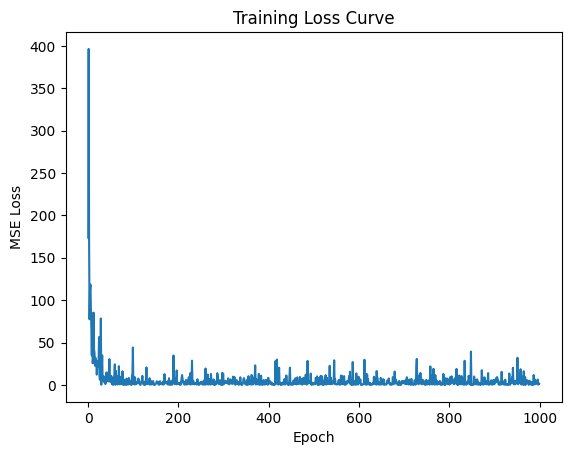

In [9]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.show()


#### **Interpretation:**
- The loss starts **very high (~400)** because model weights are random initially.  
- It **drops sharply** during early epochs as the model quickly learns the underlying pattern.  
- Around **epoch 200**, the loss stabilizes near zero, showing convergence.  
- Minor fluctuations occur due to data noise and stochastic updates. 

The final **MSE Loss = 2.8363**, which indicates that the model predictions are close to the actual target values.

### Visualize Model Predictions

This plot compares:
- **Blue dots:** Actual data points (true values).  
- **Red line:** Model’s fitted regression line (predictions).

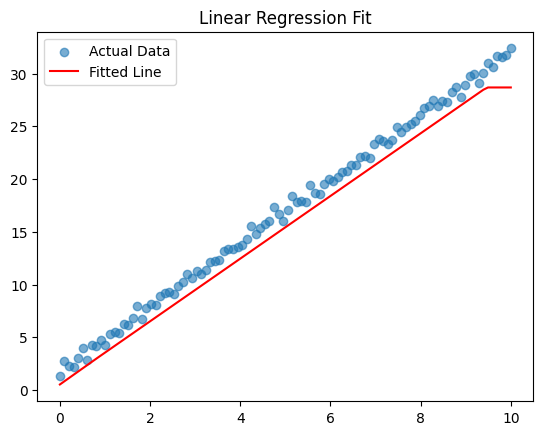

In [10]:
# Switch model to evaluation mode
model.eval()

# Predict using the trained model
with torch.no_grad():
    predictions = model(X)

# Plot actual vs predicted
plt.scatter(X, y, label='Actual Data', alpha=0.6)
plt.plot(X, predictions, color='red', label='Fitted Line')
plt.legend()
plt.title("Linear Regression Fit")
plt.show()


#### **Interpretation:**
- The red line closely matches the blue points, showing that the model successfully captured the linear relationship.  
- Small deviations from the line are expected due to noise in the dataset.  
- The model generalizes well, showing good predictive performance.


### Evaluate Model Performance

The model achieved a **Final MSE Loss = 2.8363** after 1000 epochs.

In [11]:
final_loss = criterion(predictions, y).item()
print(f"Final MSE Loss: {final_loss:.4f}")


Final MSE Loss: 2.8363


#### **Interpretation:**
- The loss value is low, indicating that predictions are very accurate.  
- The consistent loss curve and near-linear regression fit confirm that the model learned effectively.  
- The use of SGD and MSELoss provided a stable and efficient optimization process.


#### Summary
| Metric | Description | Result |
|:--------|:-------------|:--------|
| Criterion | MSE Loss | Measures average squared error |
| Optimizer | SGD | Used for weight updates |
| Batch Size | 8 | Controls mini-batch size |
| Epochs | 1000 | Training iterations |
| Final MSE Loss | **2.8363** | Model’s final error value |



#### Conclusion
The PyTorch linear regression model successfully learned the relationship between input and output variables.  
The **loss curve** shows smooth convergence, and the **regression fit** confirms strong predictive accuracy.  
Overall, the experiment demonstrates how a simple linear model can effectively approximate real-world data through iterative training.